<a href="https://colab.research.google.com/github/MMBAYAR/IPG23/blob/main/Vebet9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#    Graph formatting

plt.rcParams['font.size'] = 10

# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [3]:
df = pd.read_csv('/content/Auto(ogrenci).csv').iloc[:,1:-2]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,NaN,307.0,130.0,3504.0,12.0,70.0
1,NaN,8.0,350.0,165.0,3693.0,11.5,70.0
2,18.0,8.0,318.0,150.0,NaN,11.0,70.0
3,16.0,8.0,NaN,NaN,3433.0,NaN,70.0
4,17.0,8.0,302.0,NaN,3449.0,10.5,70.0
...,...,...,...,...,...,...,...
392,27.0,4.0,140.0,NaN,2790.0,15.6,82.0
393,44.0,4.0,97.0,NaN,2130.0,NaN,82.0
394,32.0,4.0,NaN,84.0,2295.0,11.6,82.0
395,28.0,NaN,120.0,NaN,2625.0,18.6,82.0


In [4]:
df = df.astype(float)

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler(with_std=True,
                        with_mean=True)
df_normalize = scaler.fit_transform(df)

In [7]:
pca_df = PCA()

In [8]:
pca_df.fit( df_normalize )

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [9]:
X = df_normalize
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape

LinAlgError: SVD did not converge

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,NaN,307.0,130.0,3504.0,12.0,70.0
1,NaN,8.0,350.0,165.0,3693.0,11.5,70.0
2,18.0,8.0,318.0,150.0,NaN,11.0,70.0
3,16.0,8.0,NaN,NaN,3433.0,NaN,70.0
4,17.0,8.0,302.0,NaN,3449.0,10.5,70.0
...,...,...,...,...,...,...,...
392,27.0,4.0,140.0,NaN,2790.0,15.6,82.0
393,44.0,4.0,97.0,NaN,2130.0,NaN,82.0
394,32.0,4.0,NaN,84.0,2295.0,11.6,82.0
395,28.0,NaN,120.0,NaN,2625.0,18.6,82.0


In [18]:
df.apply( np.isnan )

df['mpg'].index[ df['mpg'].apply( np.isnan ) ]

Index([  1,   7,   9,  11,  26,  28,  35,  44,  64,  69,  70,  94,  97, 104,
       108, 114, 123, 124, 131, 133, 139, 142, 144, 145, 148, 151, 154, 157,
       158, 161, 164, 165, 167, 173, 184, 192, 196, 202, 209, 218, 224, 233,
       237, 252, 254, 261, 263, 265, 272, 275, 279, 287, 288, 304, 310, 315,
       321, 327, 332, 344, 345, 346, 356, 360, 361, 371, 372, 374, 378, 385,
       387, 389, 396],
      dtype='int64')

In [19]:
eksik = [

        df[ df.columns[j] ].index[ df[df.columns[j] ].apply(np.isnan) ]

        for j in range(len(df.columns))

        ]

eksik

[Index([  1,   7,   9,  11,  26,  28,  35,  44,  64,  69,  70,  94,  97, 104,
        108, 114, 123, 124, 131, 133, 139, 142, 144, 145, 148, 151, 154, 157,
        158, 161, 164, 165, 167, 173, 184, 192, 196, 202, 209, 218, 224, 233,
        237, 252, 254, 261, 263, 265, 272, 275, 279, 287, 288, 304, 310, 315,
        321, 327, 332, 344, 345, 346, 356, 360, 361, 371, 372, 374, 378, 385,
        387, 389, 396],
       dtype='int64'),
 Index([  0,  16,  19,  25,  32,  35,  38,  39,  42,  44,  48,  51,  54,  56,
         58,  75,  80,  90,  96, 102, 103, 105, 108, 116, 117, 118, 123, 124,
        129, 133, 134, 135, 143, 144, 145, 148, 150, 152, 153, 170, 173, 174,
        178, 179, 184, 187, 200, 209, 210, 213, 222, 232, 237, 240, 244, 247,
        252, 258, 259, 265, 271, 274, 277, 286, 298, 303, 315, 316, 319, 329,
        331, 337, 343, 353, 360, 365, 374, 380, 381, 385, 388, 389, 395, 396],
       dtype='int64'),
 Index([  3,   9,  14,  15,  29,  42,  49,  55,  62,  64,  67,  68,  72

In [20]:
c_idx = []
for j in range(len(eksik)):
  for i in range(len(eksik[j])):
    c_idx.append(j)

r_idx = []
for j in range(len(eksik)):
  r_idx += list(eksik[j])

In [21]:
Xna = X.copy()

In [22]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M]
    return L.dot(V[:M])

In [23]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]

In [24]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)

In [25]:
while rel_err > thresh:
    count += 1
    # Step 2(a)
    Xapp = low_rank(Xhat, M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))

Iteration: 1, MSS:0.325, Rel.Err 6.75e-01
Iteration: 2, MSS:0.292, Rel.Err 3.26e-02
Iteration: 3, MSS:0.287, Rel.Err 4.78e-03
Iteration: 4, MSS:0.286, Rel.Err 1.12e-03
Iteration: 5, MSS:0.286, Rel.Err 3.49e-04
Iteration: 6, MSS:0.286, Rel.Err 1.29e-04
Iteration: 7, MSS:0.286, Rel.Err 5.38e-05
Iteration: 8, MSS:0.285, Rel.Err 2.41e-05
Iteration: 9, MSS:0.285, Rel.Err 1.14e-05
Iteration: 10, MSS:0.285, Rel.Err 5.57e-06
Iteration: 11, MSS:0.285, Rel.Err 2.80e-06
Iteration: 12, MSS:0.285, Rel.Err 1.43e-06
Iteration: 13, MSS:0.285, Rel.Err 7.45e-07
Iteration: 14, MSS:0.285, Rel.Err 3.93e-07
Iteration: 15, MSS:0.285, Rel.Err 2.09e-07
Iteration: 16, MSS:0.285, Rel.Err 1.12e-07
Iteration: 17, MSS:0.285, Rel.Err 6.05e-08


In [45]:
pd.DataFrame(
    index = df.index,
    columns = df.columns,
    data = scaler.inverse_transform(Xapp)
    ).round()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,16.0,7.0,301.0,145.0,3837.0,14.0,74.0
1,12.0,8.0,354.0,164.0,4252.0,13.0,73.0
2,13.0,8.0,339.0,158.0,4131.0,13.0,73.0
3,14.0,8.0,319.0,151.0,3974.0,13.0,74.0
4,14.0,8.0,328.0,154.0,4048.0,13.0,73.0
...,...,...,...,...,...,...,...
392,28.0,4.0,125.0,79.0,2452.0,17.0,77.0
393,35.0,3.0,36.0,46.0,1750.0,18.0,79.0
394,29.0,4.0,120.0,77.0,2412.0,17.0,77.0
395,30.0,4.0,96.0,68.0,2223.0,17.0,78.0


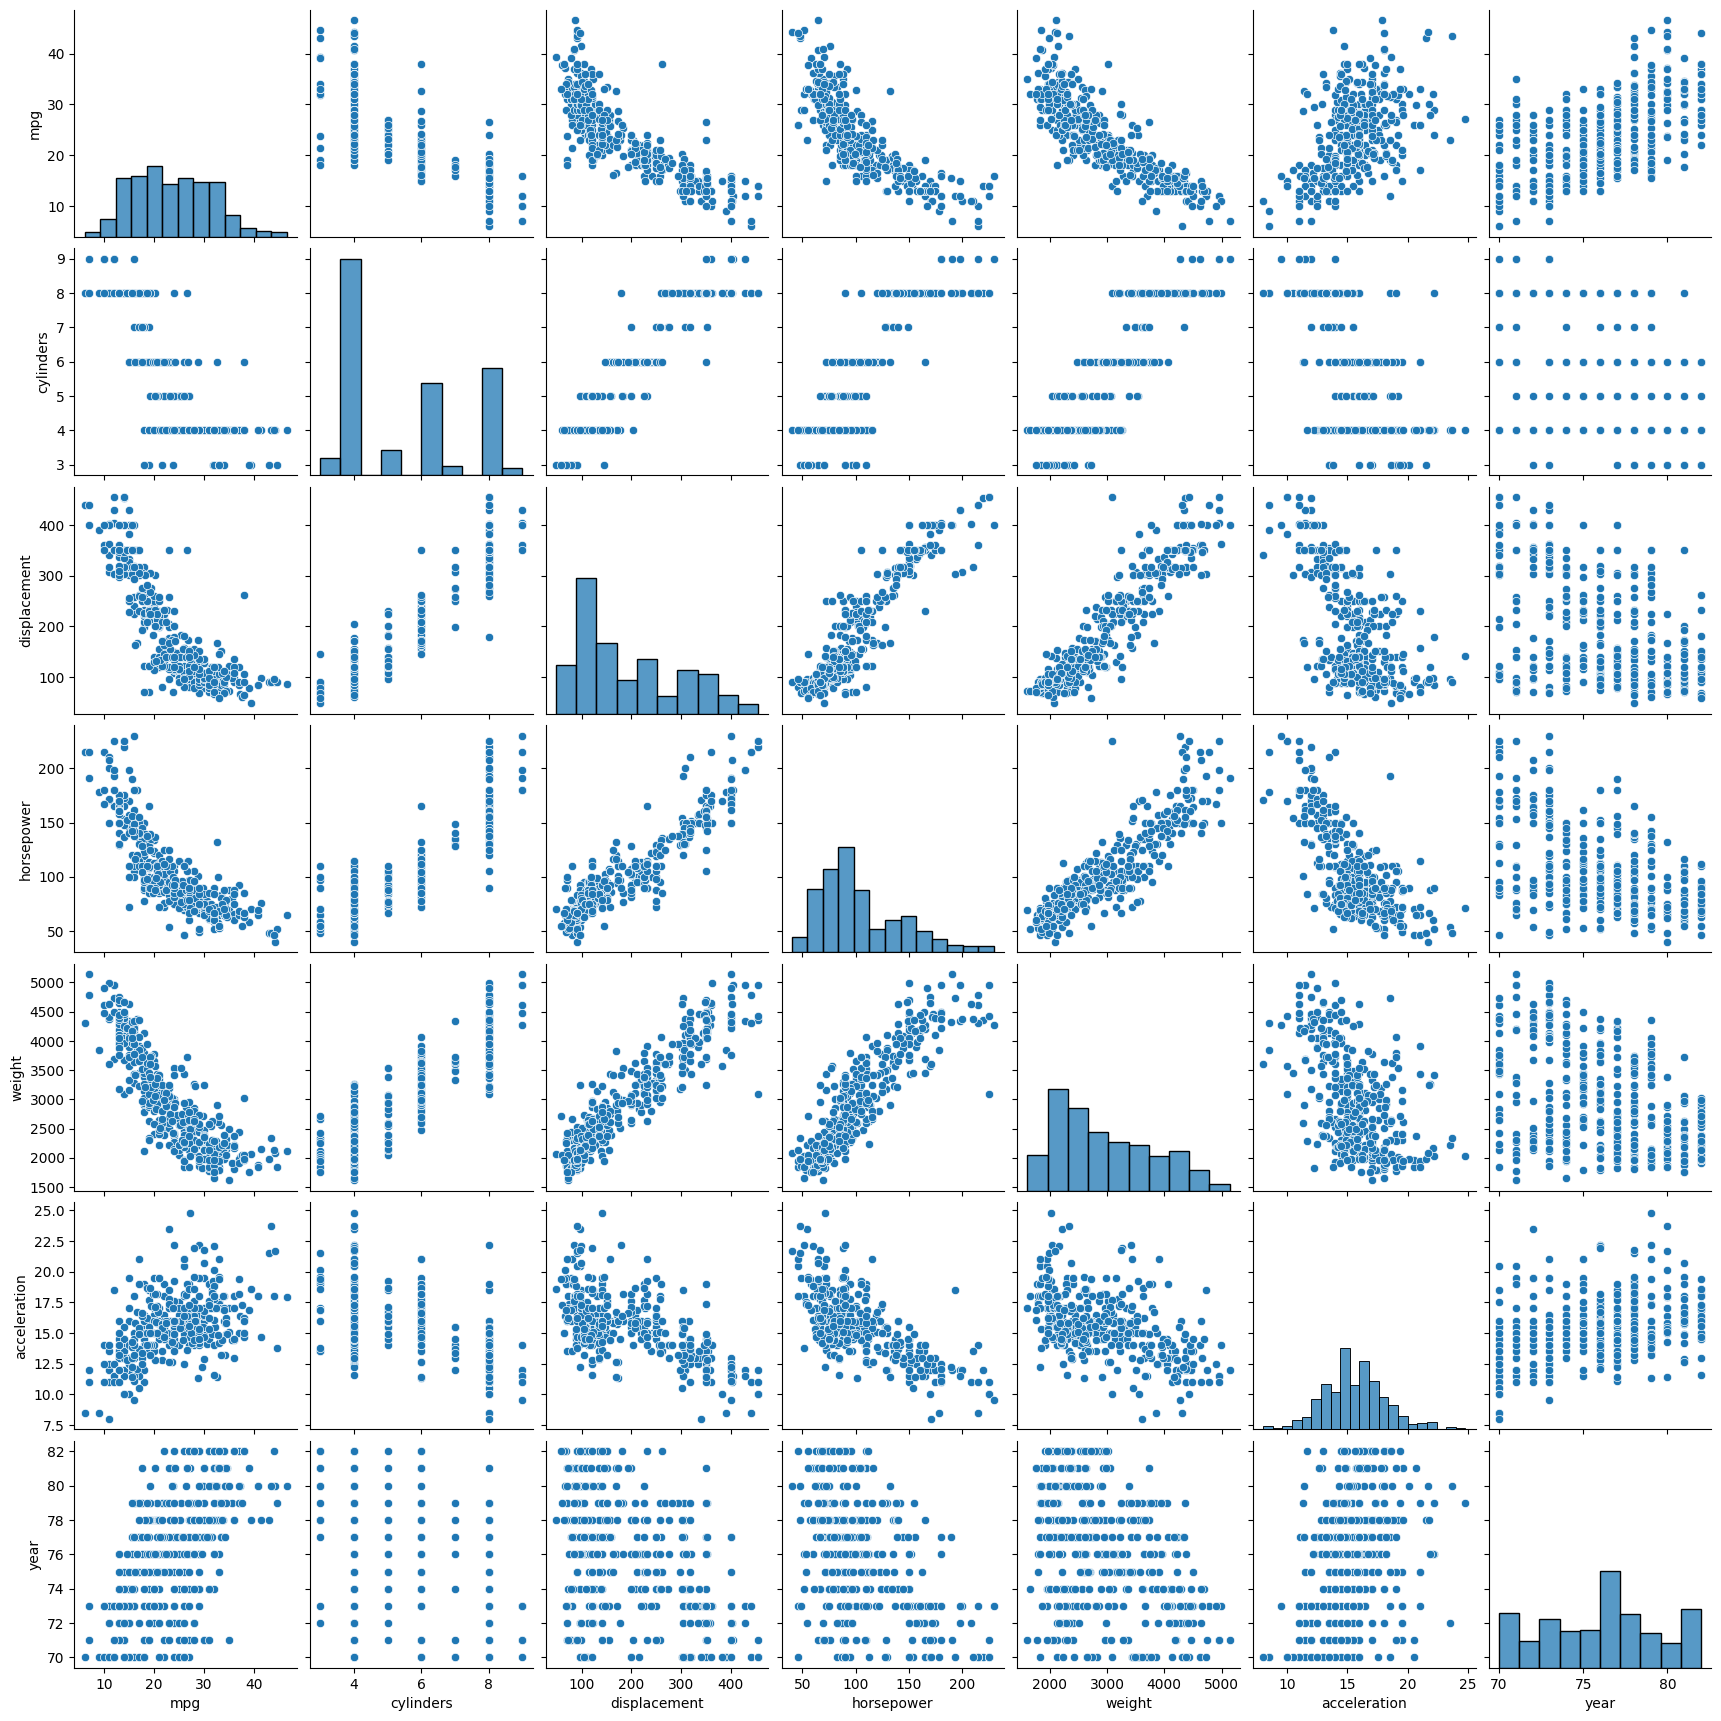

In [49]:
tv = df.copy()

tv.fillna(
          pd.DataFrame(
              index = df.index,
              columns = df.columns,
              data = scaler.inverse_transform(Xapp)
              ).round(),
          inplace = True
          )

sns.pairplot(tv)

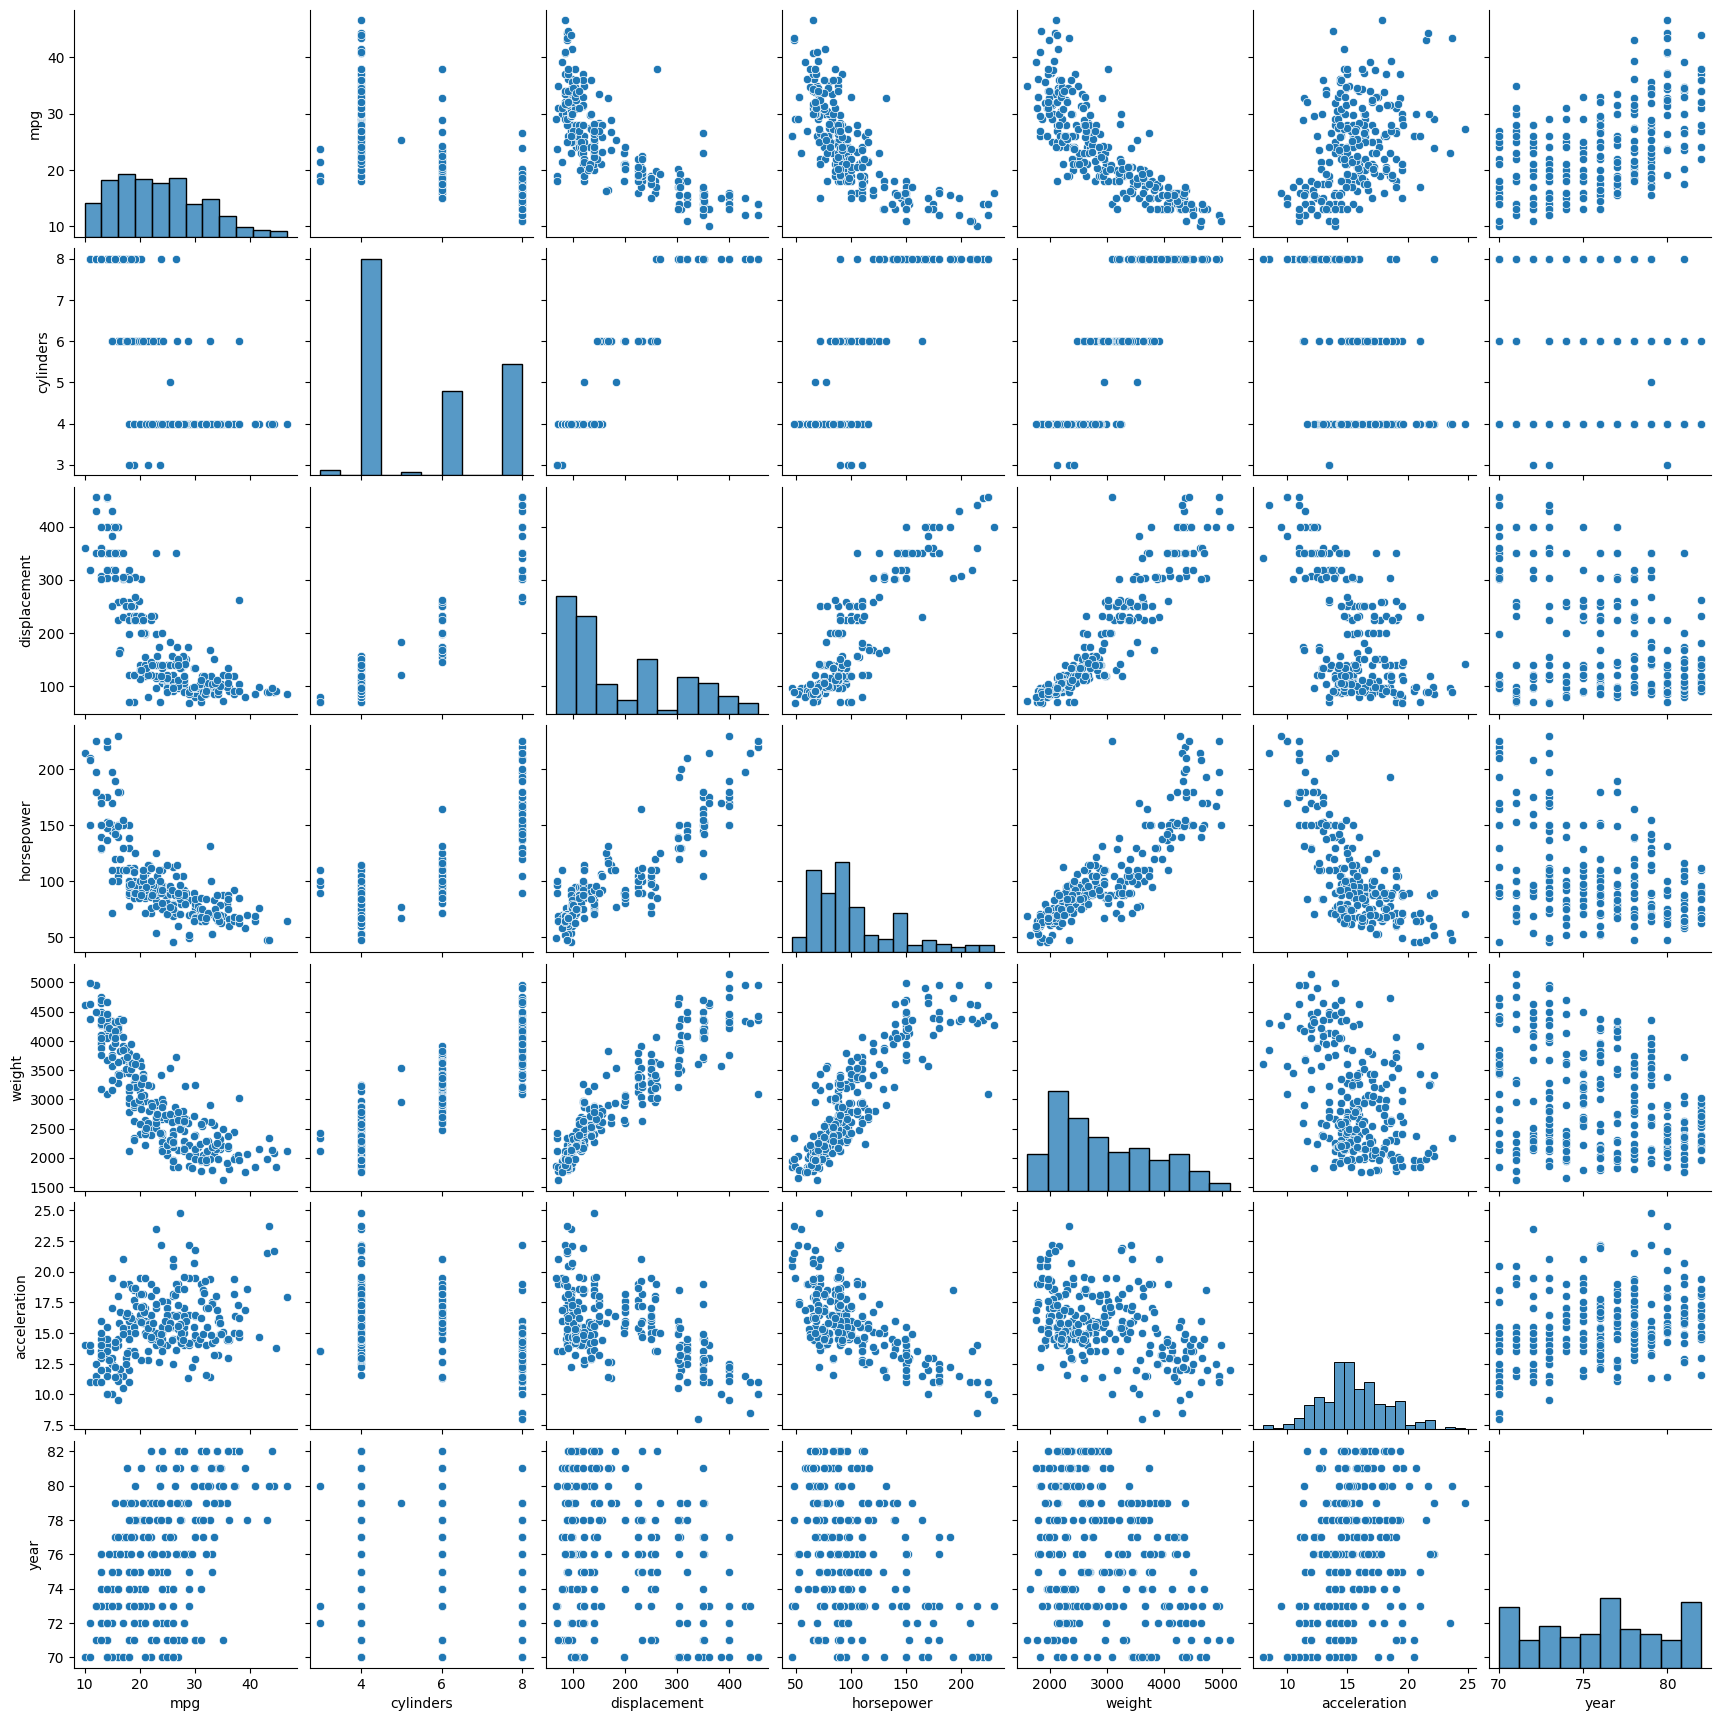

In [32]:
sns.pairplot(df)